# Pixels

## Import libraries

In [5]:
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting
# show plots in notebook
%matplotlib inline

## Accessing pixel values

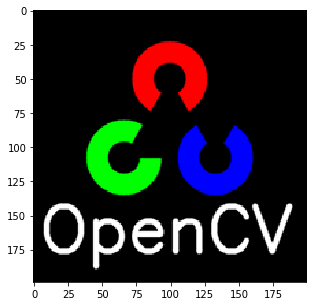

In [6]:
img = cv2.imread('opencv_logo.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV reads an image in the BGR order by default, this function can change the order to RGB
plt.figure(figsize = (9, 5))
plt.imshow(img_rgb)

In [7]:
px_rgb = img_rgb[30, 100] # pixel value at row = 30, column = 100
print(px_rgb)

[255   0   0]


## Grayscale image

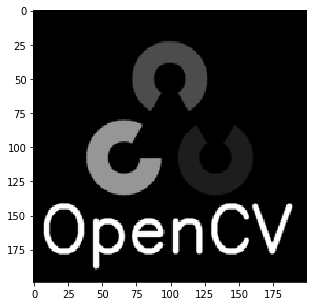

In [8]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Change the color image to a grayscale image
plt.figure(figsize = (9, 5))
plt.imshow(img_gray, cmap='gray')

In [9]:
px_gray = img_gray[30, 100] # pixel value at row = 30, column = 100
print(px_gray)

76


(<matplotlib.image.AxesImage at 0x7fc8555022b0>, Text(0.5, 1.0, 'Gray'))

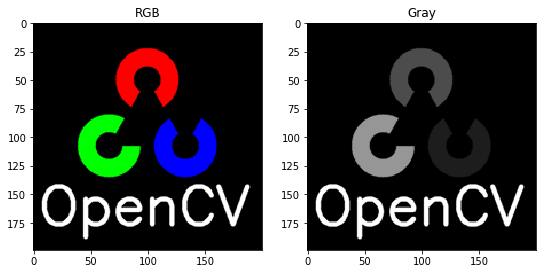

In [10]:
fig, (ax1, ax2) = plt.subplots(figsize = (9, 5), ncols = 2)
ax1.imshow(img_rgb), ax1.set_title("RGB")
ax2.imshow(img_gray, cmap='gray'), ax2.set_title("Gray")

## Image ROI

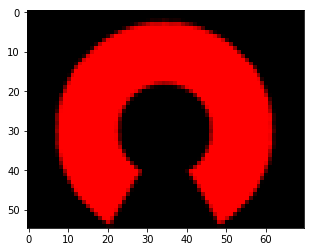

In [11]:
ROI = img_rgb[20:75, 65:135] # region of interest, rows: 20 - 75, columns: 65 - 135
plt.imshow(ROI)

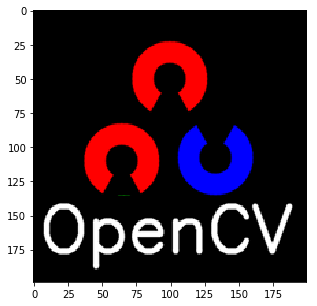

In [12]:
img_rgb[80:135, 30:100] = ROI # replace the area of rows: 80 - 135, columns: 30 - 100 with the ROI
plt.figure(figsize = (9, 5))
plt.imshow(img_rgb)

In [13]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # reset img_rgb

# Perspective transformations

## Import libraries

In [14]:
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting
# show plots in notebook
%matplotlib inline

## Perspective tranformation

(<matplotlib.image.AxesImage at 0x7fc8551ba160>, Text(0.5, 1.0, 'Transformed'))

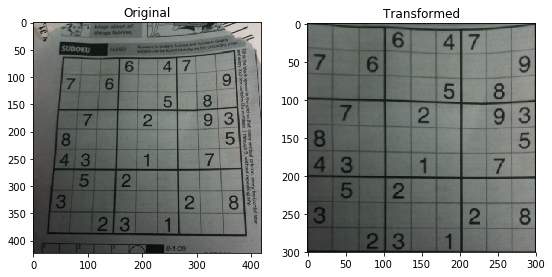

In [15]:
img = cv2.imread('sudoku.jpg') # read an image

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]]) # four points on the first image
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]]) # four points on the second image

H = cv2.getPerspectiveTransform(pts1,pts2) # homography matrix

dst = cv2.warpPerspective(img, H, (300,300))

fig, (ax1, ax2) = plt.subplots(figsize = (9, 5), ncols = 2)
ax1.imshow(img), ax1.set_title("Original")
ax2.imshow(dst), ax2.set_title("Transformed")

# Colour spaces

## Import libraries

In [1]:
import cv2 # OpenCV library
import numpy as np # Numpy library for scientific computing
import matplotlib.pyplot as plt # Matplotlib library for plotting
# show plots in notebook
%matplotlib inline

## Change Colour space to HSV

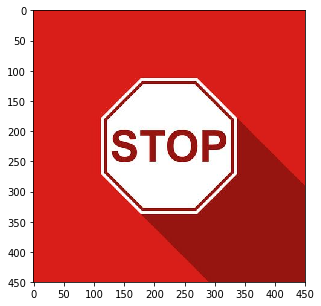

In [2]:
img = cv2.imread('stop_shadow.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # OpenCV reads an image in the BGR order by default, this function can change the order to RGB
plt.figure(figsize = (9, 5))
plt.imshow(img_rgb)

In [3]:
px_rgb = img_rgb[100, 100] # pixel value at row = 100, column = 100
print(px_rgb)
px_rgb = img_rgb[400, 400] # pixel value at row = 400, column = 400
print(px_rgb)

[217  30  25]
[150  21  16]


In [4]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # OpenCV reads an image in the BGR order by default, this function can change the order to RGB
px_hsv = img_hsv[100, 100] # pixel value at row = 100, column = 100
print(px_hsv)
px_hsv = img_hsv[400, 400] # pixel value at row = 400, column = 400
print(px_hsv)

[  1 226 217]
[  1 228 150]


# Thresholding

In [ ]:
# colour thresholding
import cv2 
import numpy as np

def nothing(x): pass

# Load image
image = cv2.imread('opencv_logo.png')

cv2.imshow('image', image)
cv2.waitKey(0) & 0xFF
cv2.destroyWindow('image')

# Create a window
# cv2.namedWindow('image', cv2.WINDOW_NORMAL) 
#cv2.resizeWindow('image', 600,750)

In [2]:
# Create trackbars for color change
# Hue is from 0-179 for Opencv
cv2.createTrackbar('HMin', 'image', 0, 179, nothing) 
cv2.createTrackbar('SMin', 'image', 0, 255, nothing) 
cv2.createTrackbar('VMin', 'image', 0, 255, nothing) 
cv2.createTrackbar('HMax', 'image', 0, 179, nothing) 
cv2.createTrackbar('SMax', 'image', 0, 255, nothing) 
cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# Set default value for Max HSV trackbars
cv2.setTrackbarPos('HMax', 'image', 179) 
cv2.setTrackbarPos('SMax', 'image', 255) 
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize HSV min/max values
hMin = sMin = vMin = hMax = sMax = vMax = 0 
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

while(1):

    # Get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin', 'image')
    sMin = cv2.getTrackbarPos('SMin', 'image')
    vMin = cv2.getTrackbarPos('VMin', 'image')
    hMax = cv2.getTrackbarPos('HMax', 'image')
    sMax = cv2.getTrackbarPos('SMax', 'image')
    vMax = cv2.getTrackbarPos('VMax', 'image')

    # Set minimum and maximum HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Convert to HSV format and color threshold
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Print if there is a change in HSV value
    if((phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display result image
    cv2.imshow('image', result)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()

error: OpenCV(3.4.2) /io/opencv/modules/highgui/src/window_QT.cpp:605: error: (-27:Null pointer) NULL guiReceiver (please create a window) in function 'cvCreateTrackbar2'
